<a href="https://colab.research.google.com/github/tanisaur/forumla1-mini-sprint/blob/Nabil/NH_formula1_mini_sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a shared drive to mount data

In [6]:
!git clone https://github.com/tanisaur/forumla1-mini-sprint.git


Cloning into 'forumla1-mini-sprint'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 118 (delta 23), reused 3 (delta 3), pack-reused 86
Receiving objects: 100% (118/118), 6.34 MiB | 14.04 MiB/s, done.
Resolving deltas: 100% (53/53), done.


#**Team 19:**


##*Scenario:*
We are a data consulting firm that has been hired by the worst performing constructor to help them hire a new team of drivers and improve their performance standings

##*Hypothesis:*
By analyzing the historical performance data of Formula 1 teams, we can identify key factors that contribute to good performance and recommend specific strategies for the worst-performing team to improve their race results.

Factors such as pit stop, qaulify times, grid position

##*Initial Data Exploration:*

- Heatmap to show correlation

- Aggregating pit stop times

- Ranking of Teams with quickest pit stops

- Ranking of Teams lowest grid position






# **Import libraries**

In [3]:
pip install fastf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.0/130.0 kB 743.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.7 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1 as ff1
%matplotlib inline

# Read in Data

**Read in data**

In [7]:
driver_standings = pd.read_csv('//content/forumla1-mini-sprint/data/driver_standings.csv')
drivers = pd.read_csv('/content/forumla1-mini-sprint/data/drivers.csv')
results = pd.read_csv('/content/forumla1-mini-sprint/data/results.csv')
constructors = pd.read_csv('/content/forumla1-mini-sprint/data/constructors.csv')
constructor_results = pd.read_csv('/content/forumla1-mini-sprint/data/constructor_results.csv')
constructor_standings = pd.read_csv('/content/forumla1-mini-sprint/data/constructor_standings.csv')
races = pd.read_csv('/content/forumla1-mini-sprint/data/races.csv')
pit_stops = pd.read_csv('/content/forumla1-mini-sprint/data/pit_stops.csv')
qualifying = pd.read_csv('/content/forumla1-mini-sprint/data/qualifying.csv')


# Explore Data

Checking the info of each included data, # of columns, # of rows

In [8]:
#only include
drivers = drivers[['driverId', 'driverRef', 'number', 'forename']]
pit_stops = pit_stops[['raceId', 'driverId', 'stop', 'lap', 'duration', 'milliseconds']]

#merge pit stop times and drivers data frame
drivers_and_pit_stops = pd.merge(drivers, pit_stops, on=['driverId'])

drivers_and_pit_stops






,driverId,driverRef,number,forename,raceId,stop,lap,duration,milliseconds
0,1,hamilton,44,Lewis,841,1,16,23.227,23227
1,1,hamilton,44,Lewis,841,2,36,23.199,23199
2,1,hamilton,44,Lewis,842,1,12,22.552,22552
3,1,hamilton,44,Lewis,842,2,24,22.611,22611
4,1,hamilton,44,Lewis,842,3,37,25.382,25382
...,...,...,...,...,...,...,...,...,...
10084,858,sargeant,2,Logan,1109,1,13,24.001,24001
10085,858,sargeant,2,Logan,1109,2,34,22.197,22197
10086,858,sargeant,2,Logan,1110,1,8,23.570,23570
10087,858,sargeant,2,Logan,1110,2,24,23.938,23938


In [9]:
#summary statistics
print(drivers_and_pit_stops.describe(include='all'))
#basic info
print("\nBasic Info:\n")
print(drivers_and_pit_stops.info())

#info about unique data points
print("\nUnqiue Data Points:\n")
print(drivers_and_pit_stops.nunique())

#Missing values
print("\nMissing Values:\n")
print(drivers_and_pit_stops.isnull().sum())

#Check for duplicate values (Empty Frame means no duplicated rows)
print("\nDuplicate Values:\n")
duplicatedvals = drivers_and_pit_stops[drivers_and_pit_stops.duplicated()]
print(duplicatedvals)



            driverId driverRef number forename        raceId          stop  \
count   10089.000000     10089  10089    10089  10089.000000  10089.000000   
unique           NaN        72     44       66           NaN           NaN   
top              NaN  hamilton     \N     Nico           NaN           NaN   
freq             NaN       493   1177      567           NaN           NaN   
mean      523.998910       NaN    NaN      NaN    962.774011      1.759738   
std       389.698555       NaN    NaN      NaN     81.144375      0.916282   
min         1.000000       NaN    NaN      NaN    841.000000      1.000000   
25%        18.000000       NaN    NaN      NaN    888.000000      1.000000   
50%       815.000000       NaN    NaN      NaN    958.000000      2.000000   
75%       831.000000       NaN    NaN      NaN   1035.000000      2.000000   
max       858.000000       NaN    NaN      NaN   1110.000000      6.000000   

                 lap duration  milliseconds  
count   10089.000

In [11]:
#Calculating average pitstop times for each driver
shortest_pit_stops = drivers_and_pit_stops.groupby(['driverId', 'driverRef']).agg({
    'milliseconds': 'mean',
}).reset_index()

#rename to clear confusion
shortest_pit_stops.rename(columns={'milliseconds': 'pit_stops_ms'}, inplace=True)

#sort values by ascending pit stop times
drivers_shortest_pit_stops_sorted = shortest_pit_stops.sort_values(by=['pit_stops_ms'], ascending=True)

top_10_drivers = drivers_shortest_pit_stops_sorted.head(10)

#Top 10 drivers with the shortest average pit stop times
top_10_drivers




,driverId,driverRef,pit_stops_ms
16,30,michael_schumacher,22541.644444
1,2,heidfeld,22933.320000
11,17,webber,23556.549296
24,808,petrov,23694.160920
7,10,glock,23743.946667
20,153,alguersuari,23862.348837
25,811,bruno_senna,23938.557377
56,843,brendon_hartley,23993.911765
19,67,buemi,24024.317073
28,814,resta,24084.259843


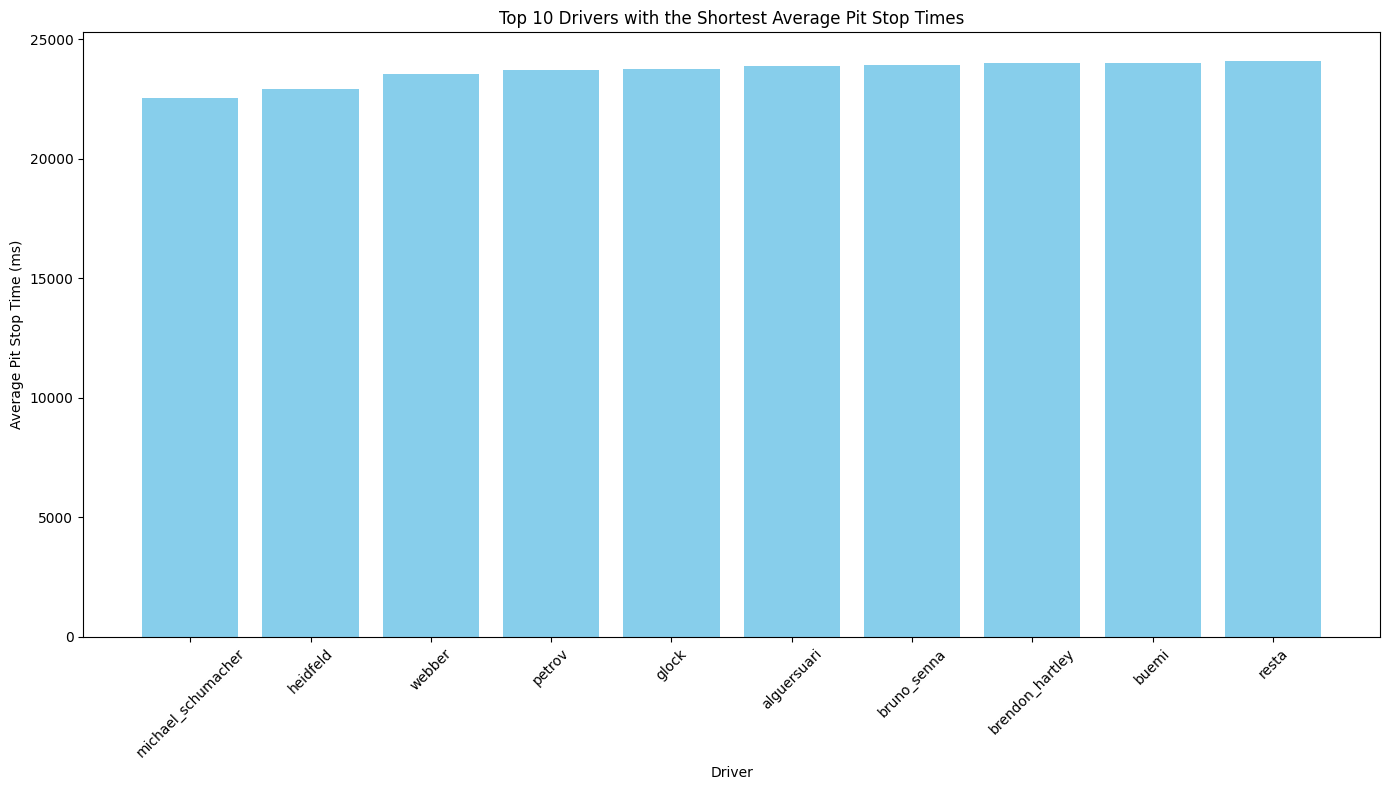

In [13]:
# Plotting the bar graph
plt.figure(figsize=(14, 8))
plt.bar(top_10_drivers['driverRef'], top_10_drivers['pit_stops_ms'], color='skyblue')
plt.xlabel('Driver')
plt.ylabel('Average Pit Stop Time (ms)')
plt.title('Top 10 Drivers with the Shortest Average Pit Stop Times')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
#Where do these drivers rank in the standings?

#summary statistics
print(driver_standings.describe(include='all'))

driver_standings = driver_standings[['driverStandingsId', 'raceId', 'driverId', 'points', 'wins']]

driver_standings




        driverStandingsId        raceId      driverId        points  \
count        34124.000000  34124.000000  34124.000000  34124.000000   
unique                NaN           NaN           NaN           NaN   
top                   NaN           NaN           NaN           NaN   
freq                  NaN           NaN           NaN           NaN   
mean         42535.650656    572.649396    307.284697     13.489987   
std          21729.601277    284.154765    267.228677     35.599709   
min              1.000000      1.000000      1.000000      0.000000   
25%          19649.750000    347.000000     85.000000      0.000000   
50%          49674.500000    595.000000    221.000000      1.000000   
75%          58946.250000    797.000000    509.000000     10.000000   
max          72187.000000   1110.000000    858.000000    454.000000   

            position positionText          wins  
count   34124.000000        34124  34124.000000  
unique           NaN          109           NaN

,driverStandingsId,raceId,driverId,points,wins
0,1,18,1,10.0,1
1,2,18,2,8.0,0
2,3,18,3,6.0,0
3,4,18,4,5.0,0
4,5,18,5,4.0,0
...,...,...,...,...,...
34119,72183,1110,846,69.0,0
34120,72184,1110,839,35.0,0
34121,72185,1110,844,99.0,0
34122,72186,1110,857,34.0,0


In [30]:
#Merge data frames that include drivrs standings and their average pit stop times
driver_standings_and_pit_stops = pd.merge(driver_standings,top_10_drivers,on =['driverId'])

#sort values by fastest average pit stop times at the top
driver_standings_and_pit_stops_sorted = driver_standings_and_pit_stops.sort_values(by =['pit_stops_ms'], ascending = True)

driver_standings_and_pit_stops_sorted


,driverStandingsId,raceId,driverId,points,wins,driverRef,pit_stops_ms
559,12732,105,30,136.0,12,michael_schumacher,22541.644444
610,11713,156,30,113.0,8,michael_schumacher,22541.644444
611,11738,157,30,123.0,9,michael_schumacher,22541.644444
612,3077,158,30,10.0,1,michael_schumacher,22541.644444
613,3086,159,30,20.0,2,michael_schumacher,22541.644444
...,...,...,...,...,...,...,...
1052,65081,866,814,21.0,0,resta,24084.259843
1051,65057,865,814,21.0,0,resta,24084.259843
1050,65033,864,814,15.0,0,resta,24084.259843
1060,65374,874,814,44.0,0,resta,24084.259843


In [38]:
drivers_performance_by_pit_stops = driver_standings_and_pit_stops_sorted.groupby(['driverId', 'driverRef']).agg({
    'points': 'sum',
    'wins': 'sum',
    'pit_stops_ms': 'mean'
}).reset_index()

top_10_drivers_pit_stops = drivers_performance_by_pit_stops.sort_values(by = ['points','wins'], ascending = False)

top_10_drivers_pit_stops

,driverId,driverRef,points,wins,pit_stops_ms
3,30,michael_schumacher,14514.0,849,22541.644444
2,17,webber,10608.0,86,23556.549296
0,2,heidfeld,2830.0,0,22933.320000
8,814,resta,1344.0,0,24084.259843
6,808,petrov,757.0,0,23694.160920
1,10,glock,445.0,0,23743.946667
7,811,bruno_senna,412.0,0,23938.557377
4,67,buemi,328.0,0,24024.317073
5,153,alguersuari,249.0,0,23862.348837
9,843,brendon_hartley,37.0,0,23993.911765


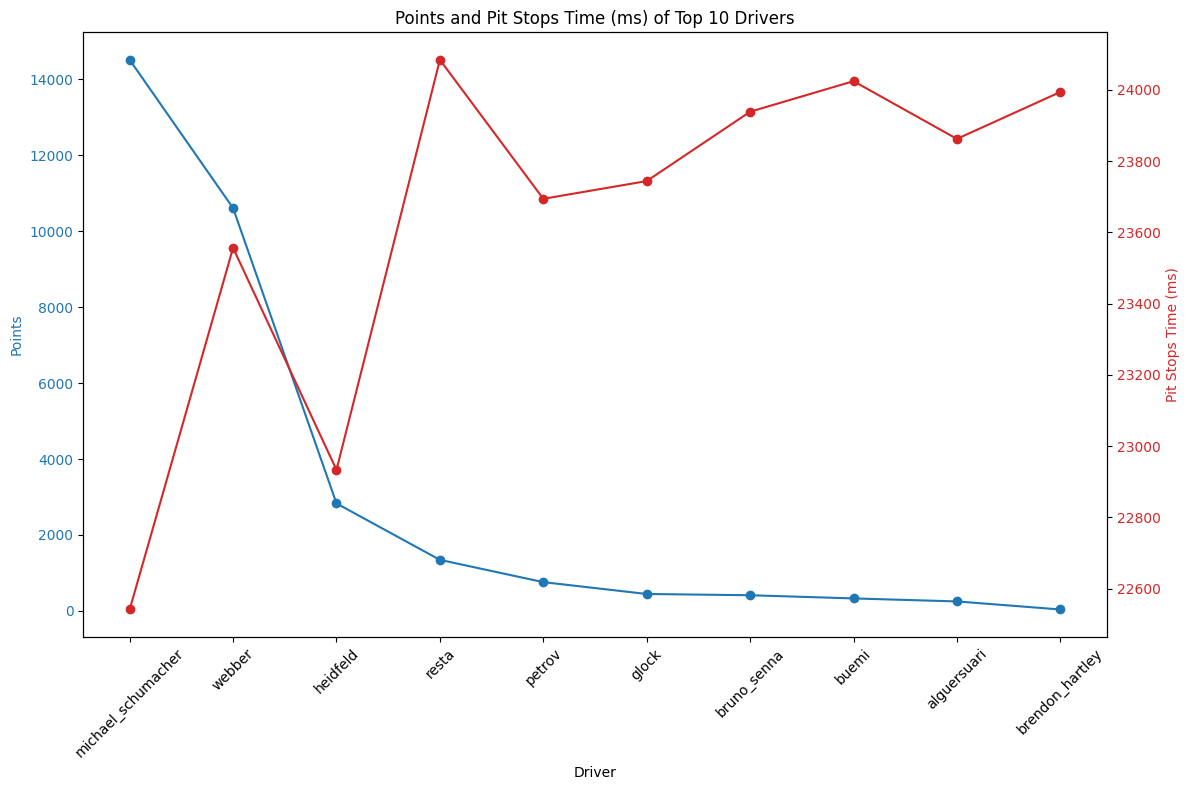

In [42]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Line graph for Points
color = 'tab:blue'
ax1.set_xlabel('Driver')
ax1.set_ylabel('Points', color=color)
ax1.plot(top_10_drivers_pit_stops['driverRef'], top_10_drivers_pit_stops['points'], marker='o', color=color, label='Points')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Create a second y-axis for Pit Stops Time (ms)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Pit Stops Time (ms)', color=color)
ax2.plot(top_10_drivers_pit_stops['driverRef'], top_10_drivers_pit_stops['pit_stops_ms'], marker='o', color=color, label='Pit Stops Time (ms)')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('Points and Pit Stops Time (ms) of Top 10 Drivers')
fig.tight_layout()
plt.show()

# Clean Data

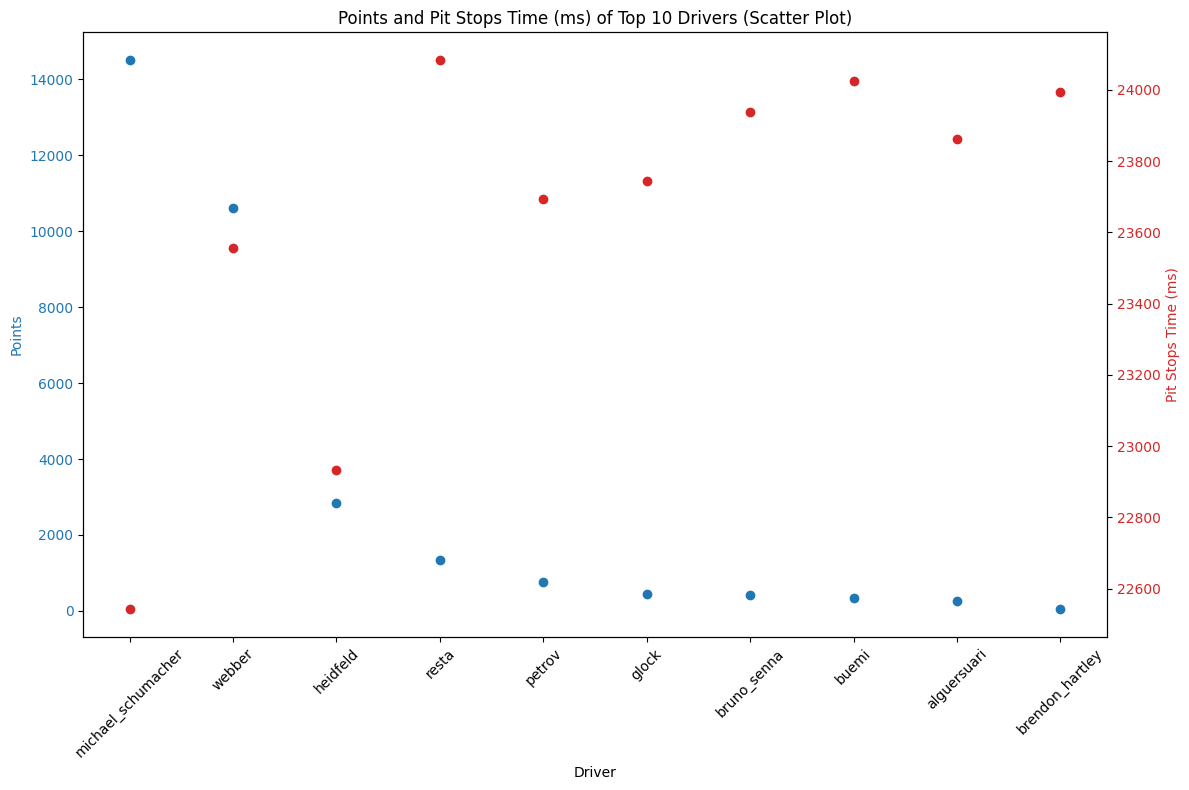

In [43]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Scatter plot for Points
color = 'tab:blue'
ax1.set_xlabel('Driver')
ax1.set_ylabel('Points', color=color)
ax1.scatter(top_10_drivers_pit_stops['driverRef'], top_10_drivers_pit_stops['points'], color=color, label='Points')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Create a second y-axis for Pit Stops Time (ms)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Pit Stops Time (ms)', color=color)
ax2.scatter(top_10_drivers_pit_stops['driverRef'], top_10_drivers_pit_stops['pit_stops_ms'], color=color, label='Pit Stops Time (ms)')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('Points and Pit Stops Time (ms) of Top 10 Drivers (Scatter Plot)')
fig.tight_layout()
plt.show()

Identify null values, find duplicates, find any outliers

# Analyze